فایل دیتاست خود را آپلود کنید (فرمت CSV):


Saving diabetes.csv to diabetes (2).csv
Mapping (cluster → label): {np.int64(1): np.int64(0), np.int64(0): np.int64(1)}
Accuracy: 0.6745
Precision: 0.5333
Recall: 0.5373

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       500
           1       0.53      0.54      0.54       268

    accuracy                           0.67       768
   macro avg       0.64      0.64      0.64       768
weighted avg       0.68      0.67      0.67       768



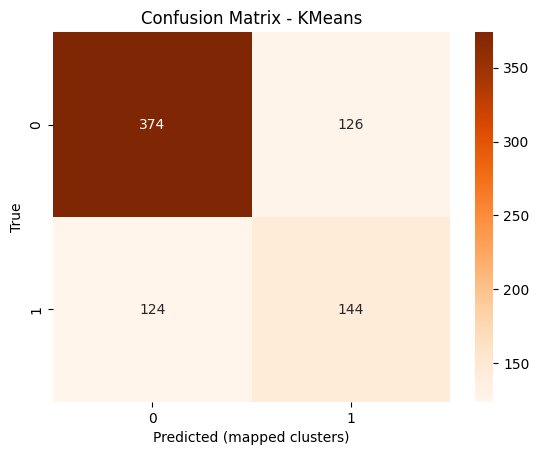

In [4]:
# === K-Means Clustering ===
!pip install -q scikit-learn matplotlib seaborn pandas scipy

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

from google.colab import files
print("فایل دیتاست خود را آپلود کنید (فرمت CSV):")
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded.keys()))]))

target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=len(np.unique(y)), n_init=20, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

def best_map(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cost = cm.max() - cm
    row_ind, col_ind = linear_sum_assignment(cost)
    mapping = {col: row for col, row in zip(col_ind, row_ind)}
    y_mapped = np.array([mapping[c] for c in y_pred])
    return y_mapped, mapping

y_mapped, mapping = best_map(y, clusters)
print("Mapping (cluster → label):", mapping)

acc = accuracy_score(y, y_mapped)
prec = precision_score(y, y_mapped, average='binary')
rec = recall_score(y, y_mapped, average='binary')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("\nClassification Report:\n", classification_report(y, y_mapped))

cm = confusion_matrix(y, y_mapped)
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="d")
plt.xlabel("Predicted (mapped clusters)")
plt.ylabel("True")
plt.title("Confusion Matrix - KMeans")
plt.show()
